In [129]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
df = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\owid-covid-data.csv")
dfh = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\current-covid-patients-hospital.csv")

dfc = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\dfcc.csv")
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfv = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\dfv.csv")
dfv.index = dfv['Unnamed: 0'].values
del dfv['Unnamed: 0']

#dff = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\WPP2019_TotalPopulationBySex.csv")

In [9]:
df

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [33]:
df['location'] == dfc.columns[0]

0          True
1          True
2          True
3          True
4          True
          ...  
138722    False
138723    False
138724    False
138725    False
138726    False
Name: location, Length: 138727, dtype: bool

In [22]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [274]:
dfv = pd.DataFrame(index = massive, columns = c)

In [62]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [277]:
df['date'] = pd.to_datetime(df['date'])

In [278]:
df['nam'] = 0
for i in range(138727):
    df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
for i in range(138727):
    if df['date'].iloc[i].year == 2021:
        df['nam'].iloc[i] = df['nam'].iloc[i]+365

<ipython-input-278-7ee7ee187150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
C:\Users\user01\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [279]:
for i in range(138727):
    dfv[df['location'][i]][df['nam'][i]]=df['people_fully_vaccinated'][i]

In [85]:
df['new_vaccinations'][653]

nan

In [182]:
dfv = pd.DataFrame(index = massive, columns = c)

In [73]:
massive = [0]*708
for i in range(708):
    massive[i] = i
c = np.unique(df['location'])

In [271]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0.0,3029151.0,0.0,0.0,0.0,0.0,0.0,0.0,184327.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37840032.0,0.0,0.0,32098.0
704,0.0,1022678.0,0.0,0.0,0.0,0.0,0.0,0.0,110748.0,0.0,...,213709.0,0.0,0.0,0.0,0.0,0.0,29861945.0,0.0,0.0,17396.0
705,0.0,2057815.0,9202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,846737.0,0.0,28118170.0,0.0,0.0,15882.0
706,0.0,484013.0,10133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,732669.0,0.0,27427957.0,0.0,8369.0,32921.0


In [280]:
dfcsr = dfc
dfvsr = dfv
dfcsr = dfc.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #лагорифмирует все значения из датафреймов
dfvsr = dfv.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #очень плохо реагирует на нули так как лагорифма его нет

C:\Users\user01\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user01\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

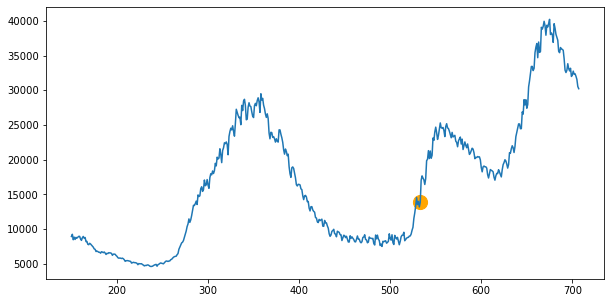

In [306]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(533, 13857.0, c = 'orange', s = 200)
plt.show

In [189]:
dfv['Russia']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
703    58480065.0
704    58695024.0
705    58798583.0
706    59156207.0
707    59561710.0
Name: Russia, Length: 708, dtype: float64

In [282]:
dfv = dfv.fillna(0)

In [197]:
a = 0
for i in range(554):
    a = a + dfc.iloc[i]['Russia']


In [198]:
a

9269978.0

In [194]:
max(dfv['Russia'])

59561710.0

In [258]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,NaN,3029151.0,NaN,NaN,NaN,NaN,NaN,NaN,184327.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37840032.0,NaN,NaN,32098.0
704,NaN,1022678.0,NaN,NaN,NaN,NaN,NaN,NaN,110748.0,NaN,...,213709.0,NaN,NaN,NaN,NaN,NaN,29861945.0,NaN,NaN,17396.0
705,NaN,2057815.0,9202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,846737.0,NaN,28118170.0,NaN,NaN,15882.0
706,NaN,484013.0,10133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,732669.0,NaN,27427957.0,NaN,8369.0,32921.0


In [205]:
dff['Time'] == 1950

0          True
1         False
2         False
3         False
4         False
          ...  
280927    False
280928    False
280929    False
280930    False
280931    False
Name: Time, Length: 280932, dtype: bool

In [252]:
np.unique(dff['Location'])

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'American Samoa', 'Andean Community', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Cari

In [313]:
a = dff[dff['Location'] == 'Russian Federation']['PopTotal'].iloc[71] * 1000
b = 0 
for i in range(708):
    if dfv['Russia'].values[i] > a * 0.4:
        print(i, dfv['Russia'].values[i])
        break

703 58480065.0


In [283]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0.0,104928289.0,0.0,0.0,0.0,0.0,0.0,0.0,30213089.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,3.507420e+09,0.0,0.0,2876054.0
704,0.0,105255538.0,975573.0,0.0,50333.0,0.0,0.0,57345.0,30265301.0,0.0,...,0.0,0.0,0,0.0,54435627.0,0.0,3.517572e+09,0.0,0.0,2884043.0
705,0.0,106175953.0,978333.0,0.0,0.0,3280340.0,0.0,0.0,0.0,516989.0,...,0.0,45349.0,0,0.0,55012304.0,0.0,3.526926e+09,0.0,740961.0,2892364.0
706,0.0,106373204.0,981170.0,0.0,0.0,0.0,0.0,0.0,30397618.0,0.0,...,0.0,0.0,0,0.0,55508435.0,0.0,3.536465e+09,0.0,747604.0,2910951.0


In [315]:
dfc['Russia'][703]

32374.0

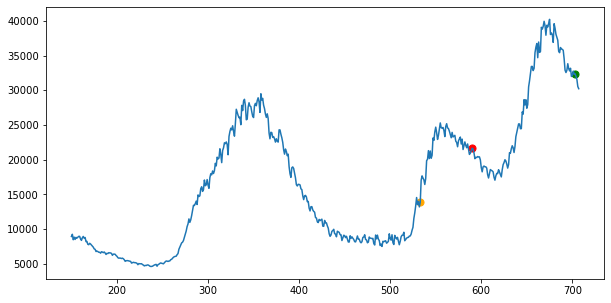

In [317]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(533, 13857.0, c = 'orange', s = 50)
plt.scatter(590, 21661.0, c = 'red', s = 50)
plt.scatter(703, 32374.0, c = 'green', s = 50)
plt.show()